<a href="https://colab.research.google.com/github/eladnahum5/Signal-Processing-Course-Udemy/blob/main/denoising_in_time_domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First challenge - denosing in time domain:

**General libraries:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

**First step will be to preview the data:**

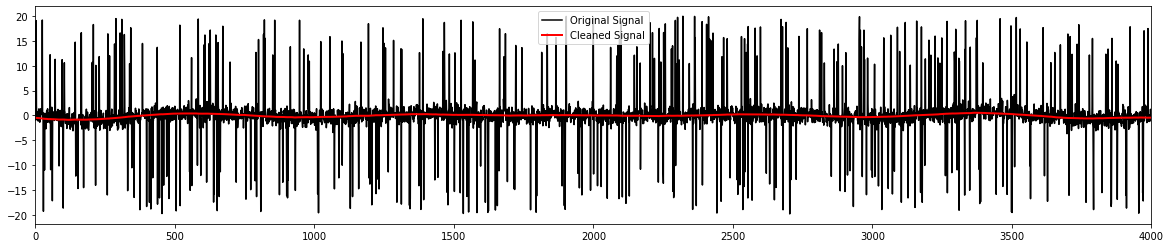

In [2]:
# Loading the data
data = sio.loadmat('/content/drive/MyDrive/Colab Notebooks/Signal Processing/Denoising in time domain/denoising_codeChallenge.mat')
origSig = list(data['origSignal'][0])
cleanedSig = list(data['cleanedSignal'][0])

# Plotting the data
plt.figure(figsize=(20,4))
plt.plot(origSig, Color='k', Label='Original Signal')
plt.plot(cleanedSig, Color='r', LineWidth=2, Label='Cleaned Signal')
plt.xlim((0, len(origSig)))
plt.legend()

**Next step will be to apply median filter:**

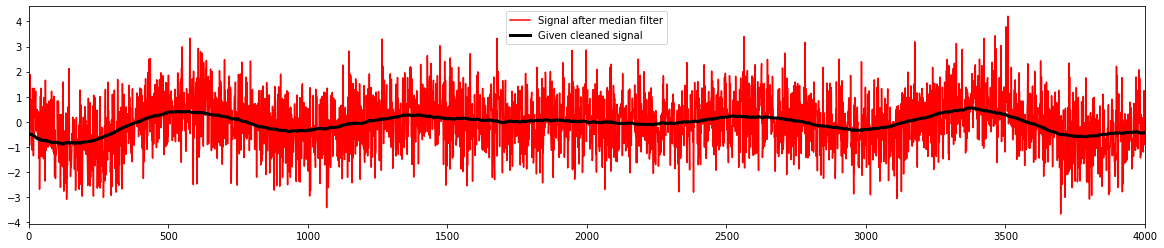

In [3]:
# Visual inspection with histogram
#plt.hist(origSig, 100)
threshold = 5; # picked by hand, will be used as absolute value (-5 to +5)

# Finding the indexes of the spikes
idx = list(np.where(np.abs(origSig) >= threshold)[0])

# Duplicating the signal
medianSig = origSig.copy()

k = 5 # actual window width is 2k+1
# Applying the filter
for i in idx:
  lowbd = max(0, i-k)
  uppbd = min(len(origSig)-1, i+k)
  medianSig[i] = np.median(origSig[lowbd:uppbd])

# Plotting
plt.figure(figsize=(20,4))
plt.plot(medianSig, color='r', Label='Signal after median filter')
plt.plot(cleanedSig, color='k', linewidth=3, Label='Given cleaned signal')
plt.xlim((0, len(origSig)))
plt.legend()


**The next and final step will be to apply mean filter:**

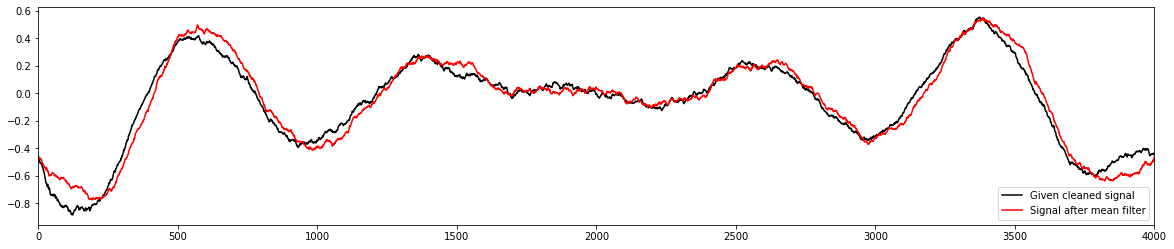

In [4]:
# The loop and process will be similar to the median filter with few changes

# Duplicating the filter:
meanSig = medianSig.copy()

k = 155 # actual window width is 2k+1
# Applying the filter
for i in range(len(medianSig)):
  lowbd = max(0, i-k)
  uppbd = min(len(origSig)-1, i+k)
  meanSig[i] = np.mean(medianSig[lowbd:uppbd])

plt.figure(figsize=(20,4))
plt.plot(cleanedSig, color='k', Label='Given cleaned signal')
plt.plot(meanSig, color='r', Label='Signal after mean filter')
plt.xlim((0, len(origSig)))
plt.legend()

#Final results:

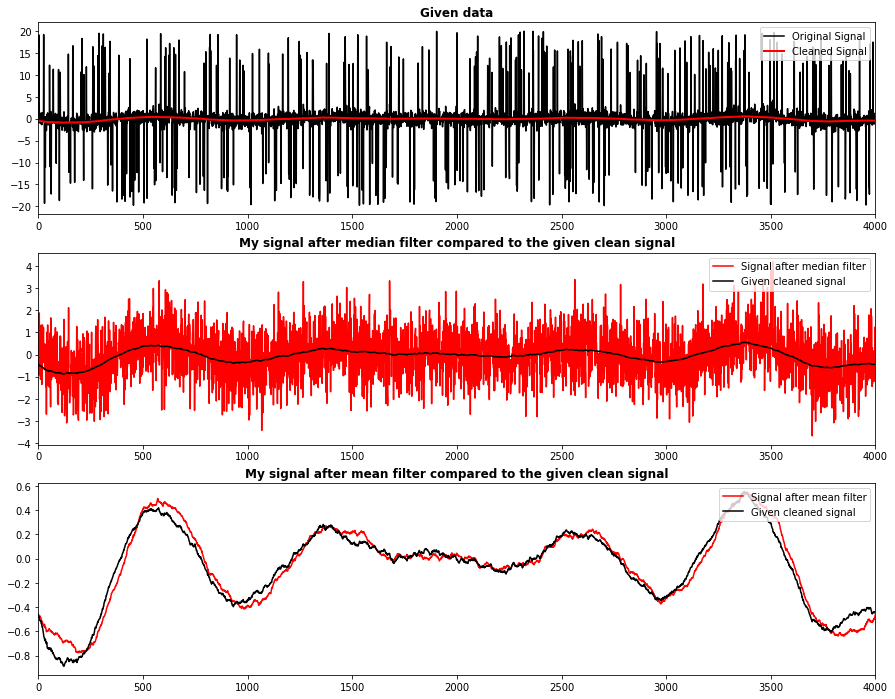

In [5]:
plt.figure(figsize=(15,12))

plt.subplot(3,1,1)
plt.plot(origSig, Color='k', Label='Original Signal')
plt.plot(cleanedSig, Color='r', LineWidth=2, Label='Cleaned Signal')
plt.title('Given data', fontweight="bold")
plt.xlim((0, len(origSig)))
plt.legend(loc='upper right')

plt.subplot(3,1,2)
plt.plot(medianSig, color='r', Label='Signal after median filter')
plt.plot(cleanedSig, color='k', Label='Given cleaned signal')
plt.title('My signal after median filter compared to the given clean signal', fontweight="bold")
plt.xlim((0, len(origSig)))
plt.legend(loc='upper right')

plt.subplot(3,1,3)
plt.plot(meanSig, color='r', Label='Signal after mean filter')
plt.plot(cleanedSig, color='k', Label='Given cleaned signal')
plt.title('My signal after mean filter compared to the given clean signal', fontweight="bold")
plt.xlim((0, len(origSig)))
plt.legend(loc='upper right')

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Signal Processing/Denoising in time domain/python_denoise_final_results.jpeg')